In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('rekomendasi_simpledesa2.csv')

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   Development Expenditure  Village Income and Expenditure Budget  \
0             1.980781e+09                           2.569049e+09   
1             2.049356e+09                           2.625417e+09   
2             2.015385e+09                           2.625198e+09   
3             1.917144e+09                           2.601832e+09   
4             2.089880e+09                           2.374219e+09   

   development index value village name name of sub-district  \
0                   0.8138       BONGAS              CILILIN   
1                   0.8905       CIBOGO              LEMBANG   
2                   0.8251        SALEM                SALEM   
3                   0.8321      KUSAMBA                DAWAN   
4                   0.8351      LAWALLU        SOPPENG RIAJA   

             district name  name of province     Proba  \
0  KABUPATEN BANDUNG BARAT        JAWA BARAT  0.784458   
1  KABUPATEN BANDUNG BARAT        JAWA BARAT  0.784458   
2         KABUPATEN BREBES

In [ ]:
# Generate descriptive statistics for numeric columns
print(df.describe())

       Development Expenditure  Village Income and Expenditure Budget  \
count             2.095500e+04                           2.095500e+04   
mean              1.367755e+09                           3.327021e+09   
std               1.309580e+10                           2.649455e+10   
min               0.000000e+00                           0.000000e+00   
25%               1.346811e+08                           1.189948e+09   
50%               7.819620e+08                           1.571256e+09   
75%               1.178642e+09                           2.067458e+09   
max               7.910000e+11                           9.956570e+11   

       development index value         Proba          Rank  
count             20955.000000  20955.000000  20955.000000  
mean                  0.759178      0.583518      1.632021  
std                   0.068422      0.059978      0.710289  
min                   0.615600      0.490007      1.000000  
25%                   0.705200      0

In [ ]:
df["Status"] = df["Status"].replace("Rekomendasi Simpledesa", "simpledesa_recommendation")

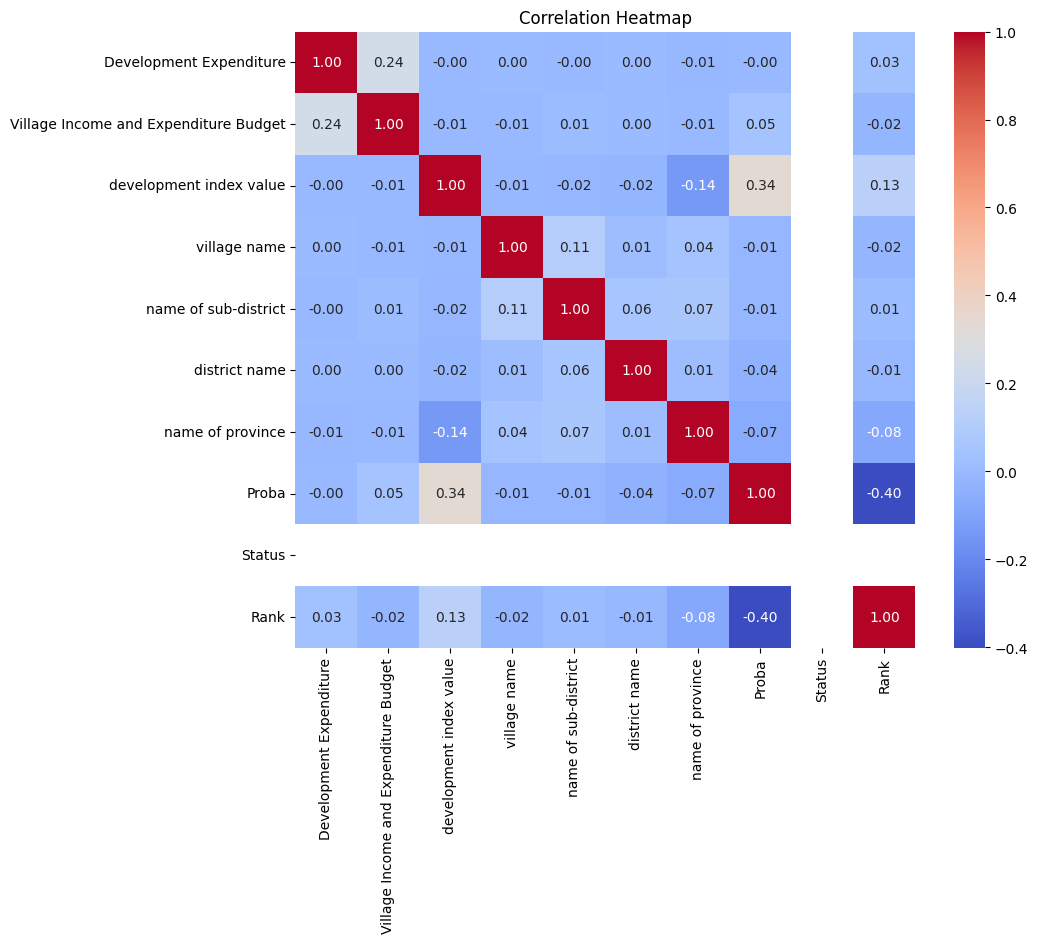

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Status' column
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

# Proceed with the model fitting and evaluation

In [ ]:
df['Income_Expenditure_Difference'] = df['Village Income and Expenditure Budget'] - df['Development Expenditure']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Assuming df is your DataFrame containing the data

# Selecting relevant features
X = df[["development index value","Status","Income_Expenditure_Difference"]]
y = df["Proba"]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

# Making predictions on the entire dataset
X_all = scaler.transform(X)
y_all_pred = model.predict(X_all)
y_all_pred = y_all_pred.flatten()

# Adding predictions to the original DataFrame
df["Prediksi_Potensi"] = y_all_pred

# Sorting the DataFrame based on predicted potential (from highest to lowest)
sorted_df = df.sort_values(by="Prediksi_Potensi", ascending=False)

# Displaying the top 10 villages with the highest potential
top_10_desa = sorted_df.head(10)
print(top_10_desa[["village name", "Prediksi_Potensi"]])

Epoch 1/20
210/210 - 2s - loss: 0.6808 - accuracy: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.0000e+00 - 2s/epoch - 9ms/step
Epoch 2/20
210/210 - 1s - loss: 0.6781 - accuracy: 0.0000e+00 - val_loss: 0.6786 - val_accuracy: 0.0000e+00 - 681ms/epoch - 3ms/step
Epoch 3/20
210/210 - 1s - loss: 0.6780 - accuracy: 0.0000e+00 - val_loss: 0.6785 - val_accuracy: 0.0000e+00 - 745ms/epoch - 4ms/step
Epoch 4/20
210/210 - 1s - loss: 0.6780 - accuracy: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 5/20
210/210 - 1s - loss: 0.6780 - accuracy: 0.0000e+00 - val_loss: 0.6785 - val_accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 6/20
210/210 - 1s - loss: 0.6779 - accuracy: 0.0000e+00 - val_loss: 0.6785 - val_accuracy: 0.0000e+00 - 686ms/epoch - 3ms/step
Epoch 7/20
210/210 - 1s - loss: 0.6779 - accuracy: 0.0000e+00 - val_loss: 0.6785 - val_accuracy: 0.0000e+00 - 685ms/epoch - 3ms/step
Epoch 8/20
210/210 - 1s - loss: 0.6779 - accuracy: 0.0000e+00 - val_loss: 0.67

In [ ]:
sorted_df.head(10)

,Development Expenditure,Village Income and Expenditure Budget,development index value,village name,name of sub-district,district name,name of province,Proba,Status,Rank,Income_Expenditure_Difference,Prediksi_Potensi
17429,6.510700e+11,0.000000e+00,0.7462,MRAWAN,MAYANG,KABUPATEN JEMBER,JAWA TIMUR,0.523418,0,2,-6.510700e+11,0.890437
16220,6.490910e+11,6.644290e+08,0.6905,PENGGUREN JAYA,BATU ENGAU,KABUPATEN PASER,KALIMANTAN TIMUR,0.534181,0,2,-6.484266e+11,0.884199
19806,5.446650e+11,4.180698e+10,0.6643,LONTAR TIMUR,PULAU LAUT BARAT,KABUPATEN KOTABARU,KALIMANTAN SELATAN,0.499546,0,2,-5.028580e+11,0.825491
18580,4.219290e+11,1.592132e+09,0.6930,TIRTO SARI,BANYUASIN I,KABUPATEN BANYUASIN,SUMATERA SELATAN,0.512592,0,2,-4.203369e+11,0.790000
947,4.141290e+11,3.130736e+08,0.6997,BUYUT MEKAR,MAJA,KABUPATEN LEBAK,BANTEN,0.700876,0,1,-4.138159e+11,0.787703
15982,2.817440e+11,1.183210e+09,0.8160,PEMATANG DUKU TIMUR,BENGKALIS,KABUPATEN BENGKALIS,RIAU,0.536221,0,2,-2.805608e+11,0.732875
1584,3.932350e+11,1.066820e+11,0.7949,KALIBAGOR,SITUBONDO,KABUPATEN SITUBONDO,JAWA TIMUR,0.682073,0,2,-2.865530e+11,0.732511
10001,0.000000e+00,2.248406e+10,0.9192,MELAYA,MELAYA,KABUPATEN JEMBRANA,BALI,0.578818,0,2,2.248406e+10,0.697512
11769,0.000000e+00,6.328975e+10,0.8786,SUNGAI BESAR,MATAN HILIR SELATAN,KABUPATEN KETAPANG,KALIMANTAN BARAT,0.564821,0,1,6.328975e+10,0.689131
19298,2.400000e+11,3.025560e+08,0.7241,POHLANDAK,PANCUR,KABUPATEN REMBANG,JAWA TENGAH,0.504792,0,3,-2.396974e+11,0.688395


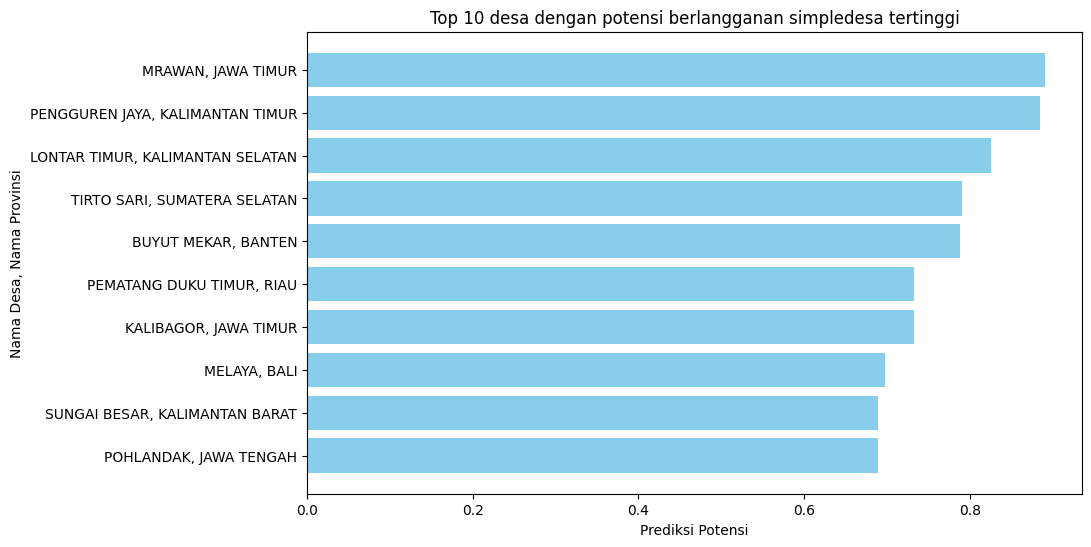

In [ ]:
import matplotlib.pyplot as plt

# Ambil 10 hasil terbesar dari sorted_data berdasarkan kolom 'prediksi_potensi'
top_10_data = sorted_df.nlargest(10, 'Prediksi_Potensi')

# Gabungkan kolom 'Nama Desa' dan 'Nama Provinsi' untuk label
top_10_data['Label'] = top_10_data['village name'] + ', ' + top_10_data['name of province']

# Buat barplot horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_data['Label'], top_10_data['Prediksi_Potensi'], color='skyblue')
plt.xlabel('Prediksi Potensi')
plt.ylabel('Nama Desa, Nama Provinsi')
plt.title('Top 10 desa dengan potensi berlangganan simpledesa tertinggi')
plt.gca().invert_yaxis()  # Membalik urutan agar yang terbesar ada di atas
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the CSV file
df = pd.read_csv('sorted_data.csv')

# Set a threshold for converting probabilities to binary predictions
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (df["Prediksi_Potensi"] > threshold).astype(int)

# Convert probabilities from 'Proba' to binary labels using the same threshold
actual = (df["Proba"] > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(actual, binary_predictions)

# Calculate precision
precision = precision_score(actual, binary_predictions)

# Calculate recall
recall = recall_score(actual, binary_predictions)

# Calculate F1-score
f1 = f1_score(actual, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9428775948460988
Precision: 0.9429675941392641
Recall: 0.9998987854251012
F1-score: 0.970599071549628
